### ✅ <span style="color:; font-size:25px;">A. 데이터 전처리</span>
#### A.a 2023년 월별 지역별 대기오염 물질 데이터 결측치 및 이상치 전처리 진행.
#### A.b 각 .xlsx 파일은 하나의 데이터프레임으로 읽어들인 후, 12개월 데이터를 하나의 통합된 CSV 파일로 저장.

In [5]:
import pandas as pd
import os

In [6]:
#처음 한번만 실행하면 됨
# 데이터 파일들이 저장된 경로 
folder_path = "/Users/kimseohee/Desktop/bigdata_submit2/2023"
all_files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]

# 빈 데이터프레임 생성
combined_data = pd.DataFrame()

# 모든 파일을 읽어와 병합
for file in all_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_excel(file_path)  # 엑셀 파일 읽기
    combined_data = pd.concat([combined_data, df], ignore_index=True)

# 통합된 데이터를 CSV로 저장
combined_data.to_csv("2023_combined_data.csv", index=False, encoding='utf-8-sig')

print("통합 CSV 파일 생성 완료: 2023_combined_data.csv")

KeyboardInterrupt: 

#### A.c 'combined_data' 데이터 프레임 출력 및 결측치/이상치 확인

In [7]:
# 저장된 CSV 파일 불러오기
combined_data = pd.read_csv("2023_combined_data.csv")

combined_data.head()
#combined_data.tail() # 총 5667288행

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 중구,도시대기,111121,중구,2023070101,0.0027,0.41,0.0249,0.0188,21.0,19.0,서울 중구 덕수궁길 15
1,서울 중구,도시대기,111121,중구,2023070102,0.0030,0.42,0.0263,0.0163,18.0,15.0,서울 중구 덕수궁길 15
2,서울 중구,도시대기,111121,중구,2023070103,0.0027,0.42,0.0218,0.0192,24.0,21.0,서울 중구 덕수궁길 15
3,서울 중구,도시대기,111121,중구,2023070104,0.0028,0.41,0.0131,0.0214,25.0,19.0,서울 중구 덕수궁길 15
4,서울 중구,도시대기,111121,중구,2023070105,0.0021,0.43,0.0131,0.0160,25.0,21.0,서울 중구 덕수궁길 15


In [5]:
# 결측치 확인
print(combined_data.isnull().sum())  # 각 열의 결측치 개수 출력

# 결측치가 포함된 행 확인
missing_data_rows = combined_data[combined_data.isnull().any(axis=1)]
print(missing_data_rows)

지역            0
망             0
측정소코드         0
측정소명          0
측정일시          0
SO2      261536
CO       275537
O3       206493
NO2      229491
PM10     250583
PM25     283946
주소            0
dtype: int64
             지역       망   측정소코드 측정소명        측정일시     SO2    CO      O3  \
40        서울 중구    도시대기  111121   중구  2023070217  0.0023  0.32  0.0530   
80        서울 중구    도시대기  111121   중구  2023070409  0.0032   NaN  0.0315   
81        서울 중구    도시대기  111121   중구  2023070410  0.0024   NaN  0.0305   
82        서울 중구    도시대기  111121   중구  2023070411  0.0024   NaN  0.0385   
83        서울 중구    도시대기  111121   중구  2023070412  0.0027   NaN  0.0422   
...         ...     ...     ...  ...         ...     ...   ...     ...   
5667157  인천 옹진군  국가배경농도  831495   울도  2023022313  0.0012  0.24  0.0427   
5667158  인천 옹진군  국가배경농도  831495   울도  2023022314     NaN   NaN     NaN   
5667159  인천 옹진군  국가배경농도  831495   울도  2023022315     NaN   NaN     NaN   
5667160  인천 옹진군  국가배경농도  831495   울도  2023022316     Na

---
#### 🧐 <span style="color:aquamarine;font-weight:bold;"> Analysis 1 </span>
* SO2, CO, O3, NO2, PM10, PM25 등의 주요 대기오염 변수에 <span style="color:skyblue;"> 결측치가 존재함. (2023년 2월 결측치 + 𝜶)</span>
* 특정 시간대와 지역에 집중적으로 발생하는 것으로 확인됨.
    - 서울 중구(111121)의 일부 시간대에서는 CO 값이 결측치(NaN)임.
    - 인천 옹진군(831495)에서는 특정 연속 시간대에 SO2, CO, O3, NO2, PM10, PM25 모든 값이 결측치임.
---

In [7]:
# 이상치 확인
print(combined_data.describe())

              측정소코드          측정일시           SO2            CO            O3  \
count  5.667289e+06  5.667289e+06  5.405753e+06  5.391752e+06  5.460796e+06   
mean   3.859382e+05  2.023067e+09  2.510351e-03  3.936220e-01  3.252405e-02   
std    2.295409e+05  3.449639e+04  1.500906e-03  1.782687e-01  1.937187e-02   
min    1.111210e+05  2.023010e+09  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.321130e+05  2.023040e+09  1.900000e-03  2.900000e-01  1.800000e-02   
50%    3.365010e+05  2.023070e+09  2.300000e-03  3.700000e-01  3.130000e-02   
75%    5.345010e+05  2.023100e+09  3.000000e-03  4.800000e-01  4.430000e-02   
max    8.314950e+05  2.023123e+09  2.730000e-01  6.160000e+00  2.358000e-01   

                NO2          PM10          PM25  
count  5.437798e+06  5.416706e+06  5.383343e+06  
mean   1.411450e-02  3.708653e+01  1.876585e+01  
std    1.169080e-02  3.261631e+01  1.488713e+01  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    6.000000e-03  1.800000e+01  9.0

---
#### 🧐 <span style="color:aquamarine;font-weight:bold;">Analysis 2</span>

* <이상치>
| **오염 물질** | **mean** | **max** | **평균 대비 최대값 비율** |
|---------------|-------------------|------------------|---------------------------|
| **SO2**       | 0.0025           | 0.273            | 약 100배 이상            |
| **CO**        | 0.3936           | 6.16             | 약 15배 이상             |
| **O3**        | 0.0325           | 0.2358           | 약 7배 이상              |
| **NO2**	    | 0.0141	       | 0.2851	          | 약 20배 이상             |
| **PM10**      | 37.09            | 1154.0           | 약 31배 이상             |
| 	<span style="color:orange; font-style:italic; font-weight:bold;">PM25</span>     | 18.77            | 584.0            | 약 31배 이상             |

* SO2, CO, O3, NO2
    - SO2의 최대값(0.273)은 평균값(0.0025)에 비해 약 100배로, 극단적인 값이 존재함.
    - CO와 O3도 평균 대비 15배, 7배로 비정상적으로 높은 값이 관찰됨.

<br>

* PM10, PM25
    - PM10의 최대값(1154.0)은 평균값(37.09)보다 31배 이상으로, 매우 높은 값이 포함됨.
    - PM25의 최대값(584.0) 또한 평균(18.77) 대비 31배 이상으로, 이상치 가능성이 큼.

<br>

* 데이터 왜곡 가능성
    - 극단값은 대기오염 데이터의 특성상 이상치일 가능성이 크며, 분석 결과를 왜곡할 수 있음. (특정 지역에서의 장비 오류, 환경적 특수 상황(산불, 공장 배출 등)
---

*📌 <span style="color:skyblue;">단, 지역별 전기차 비율과 PM2.5 농도 간의 상관관계 분석을 중점으로 진행되므로, **PM25** 데이터만 집중적으로 결측치 및 이상치 처리 진행함. </span>(Project Proposal 2. 연구 배경 참고)*

#### A.d PM25 결측치 및 이상치 처리

In [9]:
#결측치는 평균값으로 대체함
combined_data['PM25'] = combined_data['PM25'].fillna(combined_data['PM25'].mean())

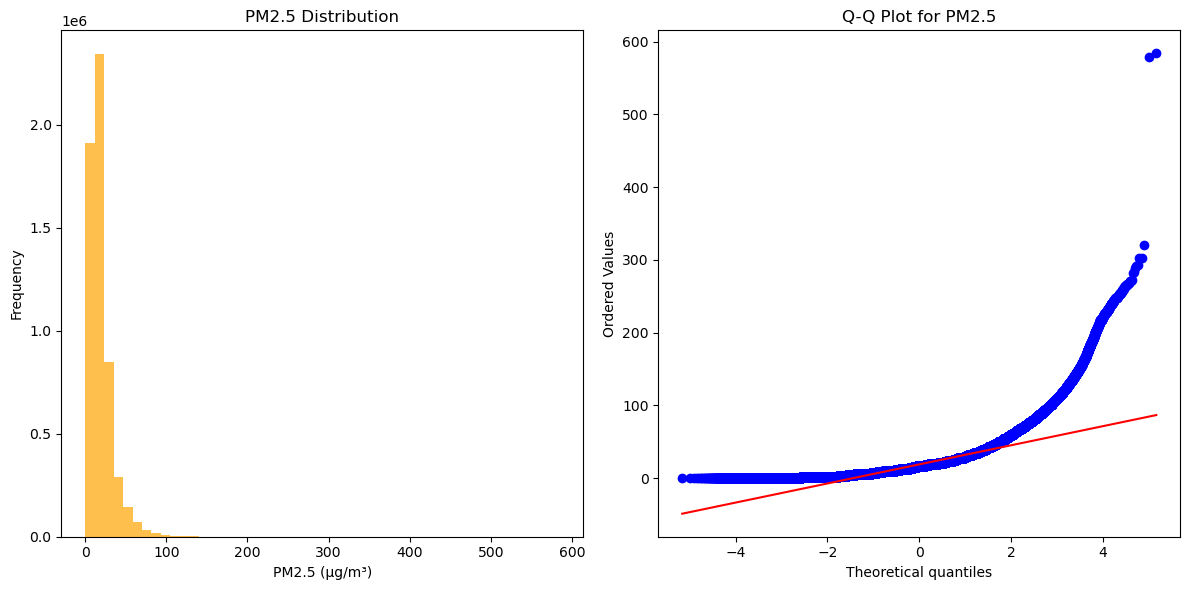

In [11]:
#이상치 처리는 PM25의 정규분포(표준편차) or 비정규분포(IQR) 파악 후 진행
import matplotlib.pyplot as plt
import scipy.stats as stats

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# PM2.5 데이터 히스토그램(left)
axes[0].hist(combined_data['PM25'].dropna(), bins=50, alpha=0.7, color='orange')
axes[0].set_title('PM2.5 Distribution')
axes[0].set_xlabel('PM2.5 (µg/m³)')
axes[0].set_ylabel('Frequency')

# PM2.5 데이터 Q-Q Plot(right)
stats.probplot(combined_data['PM25'].dropna(), dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot for PM2.5')

# 두 그래프 사이 여백 조절
plt.tight_layout()
plt.show()

---
#### 🧐 <span style="color:aquamarine;font-weight:bold;">Analysis 3</span>

* 히스토그램 (PM2.5 Distribution)
    - 데이터가 한쪽으로 치우친 <span style="color:skyblue;">비정규분포를 보이는 것으로 판단</span>됨.
    - 대부분의 값이 0~50 사이에 몰려 있으며, 소수의 값이 100 이상으로 치솟아 있음.
    - 즉, PM2.5 데이터에 극단적으로 높은 이상치가 존재할 가능성을 시사함.

<br>

* Q-Q Plot (Q-Q Plot for PM2.5)
    - PM2.5 데이터와 정규분포 이론값을 비교한 그래프임.
    - 데이터가 정규분포를 따른다면 점들이 빨간 선(대각선)을 따라야 하지만 <span style="color:skyblue;">왼쪽 하단과 오른쪽 상단에서 빨간 선과 크게 벗어난 점들이 존재</span>하고 있음.
    - 즉, PM2.5 데이터가 정규분포에서 멀리 벗어나 있으며, 특히 극단적인 이상치가 포함되어 있다는 것을 나타남.
---

In [13]:
# IQR을 활용한 이상치 탐지 및 제거
Q1 = combined_data['PM25'].quantile(0.25)  # 1사분위수
Q3 = combined_data['PM25'].quantile(0.75)  # 3사분위수
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 제거
cleaned_data = combined_data[(combined_data['PM25'] >= lower_bound) & (combined_data['PM25'] <= upper_bound)]

In [15]:
# 이상치 제거 전후 데이터 크기 비교
print(f"이상치 제거 전 데이터 크기: {len(combined_data)}")
print(f"이상치 제거 후 데이터 크기: {len(cleaned_data)}")
print(f"제거된 데이터 개수: {len(combined_data) - len(cleaned_data)}")
print(f"제거된 데이터 비율: {((len(combined_data) - len(cleaned_data)) / len(combined_data)) * 100:.2f}%")

이상치 제거 전 데이터 크기: 5667289
이상치 제거 후 데이터 크기: 5354612
제거된 데이터 개수: 312677
제거된 데이터 비율: 5.52%


In [17]:
cleaned_data.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 중구,도시대기,111121,중구,2023070101,0.0027,0.41,0.0249,0.0188,21.0,19.0,서울 중구 덕수궁길 15
1,서울 중구,도시대기,111121,중구,2023070102,0.0030,0.42,0.0263,0.0163,18.0,15.0,서울 중구 덕수궁길 15
2,서울 중구,도시대기,111121,중구,2023070103,0.0027,0.42,0.0218,0.0192,24.0,21.0,서울 중구 덕수궁길 15
3,서울 중구,도시대기,111121,중구,2023070104,0.0028,0.41,0.0131,0.0214,25.0,19.0,서울 중구 덕수궁길 15
4,서울 중구,도시대기,111121,중구,2023070105,0.0021,0.43,0.0131,0.0160,25.0,21.0,서울 중구 덕수궁길 15


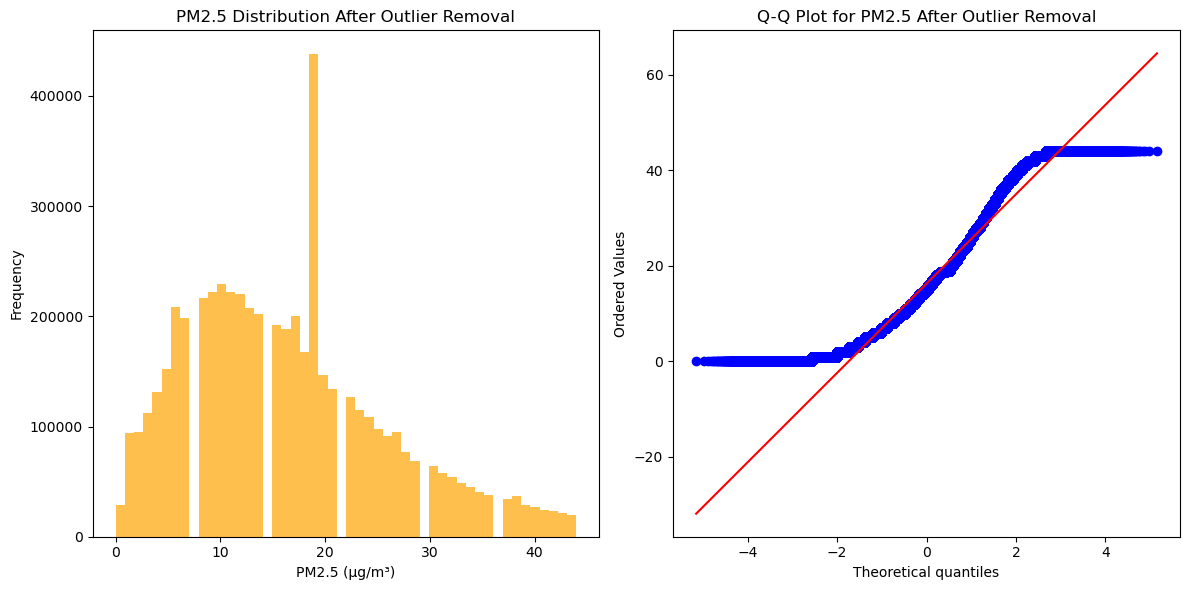

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 히스토그램 (이상치 제거 후)
axes[0].hist(cleaned_data['PM25'], bins=50, alpha=0.7, color='orange')
axes[0].set_title('PM2.5 Distribution After Outlier Removal')
axes[0].set_xlabel('PM2.5 (µg/m³)')
axes[0].set_ylabel('Frequency')

# Q-Q Plot (이상치 제거 후)
stats.probplot(cleaned_data['PM25'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot for PM2.5 After Outlier Removal')

# 그래프 간 여백 조정
plt.tight_layout()
plt.show()


In [21]:
print(cleaned_data['PM25'].value_counts().sort_index())

PM25
0.000000      28580
1.000000      94348
2.000000      94839
3.000000     111994
4.000000     131021
5.000000     152465
6.000000     208270
7.000000     198658
8.000000     216763
9.000000     222147
10.000000    229197
11.000000    222388
12.000000    220406
13.000000    208013
14.000000    202136
15.000000    192544
16.000000    188882
17.000000    200212
18.000000    168085
18.765848    283946
19.000000    153743
20.000000    146832
21.000000    133922
22.000000    127099
23.000000    115259
24.000000    108398
25.000000     97924
26.000000     91536
27.000000     95451
28.000000     76678
29.000000     68390
30.000000     64045
31.000000     57397
32.000000     54228
33.000000     48470
34.000000     45053
35.000000     40666
36.000000     38007
37.000000     34310
38.000000     37278
39.000000     28614
40.000000     27305
41.000000     24463
42.000000     23501
43.000000     21232
44.000000     19917
Name: count, dtype: int64


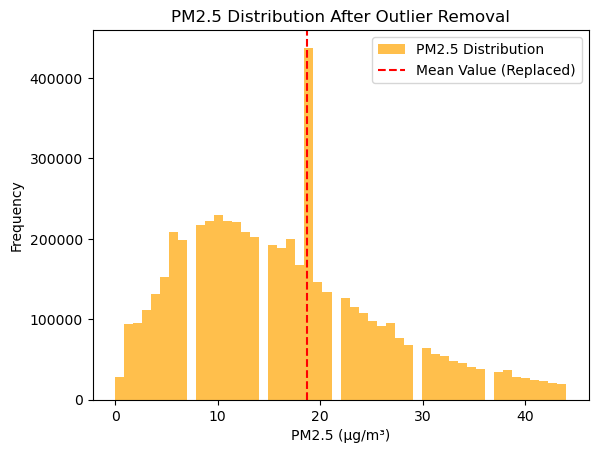

In [23]:
plt.hist(cleaned_data['PM25'], bins=50, alpha=0.7, label='PM2.5 Distribution', color='orange')
plt.axvline(18.765848, color='red', linestyle='--', label='Mean Value (Replaced)')
plt.title('PM2.5 Distribution After Outlier Removal')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

---
#### 🧐 <span style="color:aquamarine;font-weight:bold;">Analysis 3-1</span>

* **히스토그램 (PM2.5 Distribution After Outlier Removal)**
    - 이상치 제거 전과 비교해 데이터가 더 안정적인 범위로 집중되었음.
    - 대부분의 값이 0~30 µg/m³ 사이에 분포하며, 극단적인 값(40 이상)이 사라짐.
    - <span style="color:skyblue;">중앙값 근처에 피크가 나타남.(결측치를 평균값(18.765848)으로 대체했기 때문임)</span>

<br> 

* **Q-Q Plot (Q-Q Plot for PM2.5 After Outlier Removal)**
    - 데이터가 대체로 대각선 근처에 위치하지만, 여전히 끝 부분에서 대각선과 벗어나는 점들이 존재함.
    - 이는 PM2.5 데이터가 완벽한 정규분포를 따르지 않으며, 여전히 약간의 비정규성을 띤다는 것을 의미함.
    - 그러나 이상치를 제거한 결과, 극단적으로 벗어나는 점들이 많이 감소한 것을 확인할 수 있음.

<br>

* *[참고]*
    - 이상치 제거 전 데이터 크기: 5667289
    - 이상치 제거 후 데이터 크기: 5354612
    - 제거된 데이터 개수: 312677
    - 제거된 데이터 비율: 5.52%

---

#### A.e 지역 별 PM25 데이터 프레임 생성

In [25]:
# 지역별 PM2.5 평균 계산
region_avg_pm25 = cleaned_data.groupby('지역')['PM25'].mean().reset_index()
region_avg_pm25.columns = ['지역', '평균_PM25']
print(region_avg_pm25)

         지역    평균_PM25
0    강원 강릉시  13.042672
1    강원 고성군  15.664063
2    강원 동해시  15.648699
3    강원 삼척시  11.303390
4    강원 속초시  18.041553
..      ...        ...
225  충북 제천시  16.604877
226  충북 증평군  16.597635
227  충북 진천군  18.036087
228  충북 청주시  17.264332
229  충북 충주시  18.012333

[230 rows x 2 columns]


In [27]:
# 지역별 데이터프레임 딕셔너리 생성
region_dataframes = {region: cleaned_data[cleaned_data['지역'] == region] for region in cleaned_data['지역'].unique()}

# 모든 지역 데이터 병합
all_regions_data = pd.concat(region_dataframes.values(), ignore_index=True)

# 결과 확인
print(all_regions_data['지역'].unique())  # 포함된 모든 지역 이름 확인
print(all_regions_data.head())  # 병합된 데이터 일부 확인

['서울 중구' '서울 용산구' '서울 종로구' '서울 광진구' '서울 성동구' '서울 중랑구' '서울 동대문구' '서울 성북구'
 '서울 도봉구' '서울 은평구' '서울 서대문구' '서울 마포구' '서울 강서구' '서울 구로구' '서울 영등포구' '서울 동작구'
 '서울 관악구' '서울 강남구' '서울 서초구' '서울 송파구' '서울 강동구' '서울 금천구' '서울 강북구' '서울 양천구'
 '서울 노원구' '경기 수원시' '경기 성남시' '경기 의정부시' '경기 안양시' '경기 광명시' '경기 안산시' '경기 과천시'
 '경기 구리시' '경기 의왕시' '경기 시흥시' '경기 남양주시' '경기 평택시' '경기 파주시' '경기 고양시' '경기 광주시'
 '경기 용인시' '경기 이천시' '경기 포천시' '경기 김포시' '경기 군포시' '경기 오산시' '경기 하남시' '경기 화성시'
 '경기 양주시' '경기 동두천시' '경기 안성시' '경기 여주시' '경기 연천군' '경기 가평군' '경기 양평군' '강원 춘천시'
 '강원 양구군' '강원 동해시' '강원 삼척시' '강원 철원군' '강원 화천군' '강원 인제군' '강원 고성군' '부산 중구'
 '부산 동구' '부산 영도구' '부산 부산진구' '부산 동래구' '부산 남구' '부산 사상구' '부산 북구' '부산 금정구'
 '부산 해운대구' '부산 사하구' '부산 강서구' '부산 연제구' '부산 기장군' '부산 수영구' '부산 서구' '경남 창원시'
 '울산 동구' '울산 중구' '울산 남구' '울산 울주군' '울산 북구' '경남 진주시' '경남 하동군' '경남 김해시'
 '경남 거제시' '경남 사천시' '경남 양산시' '경남 밀양시' '경남 통영시' '경남 고성군' '경남 거창군' '경남 함안군'
 '경남 함양군' '경남 남해군' '경남 산청군' '경남 의령군' '경남 창녕군' '경남 합천군' '광주 동구' '광주 서구'
 '광주 남구' '광주 북구' '광주 광산구' '전북 전주시' '전남 목포시' '전남 여수시' '전

In [29]:
# 모든 지역 데이터 병합
all_regions_data = pd.concat(region_dataframes.values(), ignore_index=True)

# 결과 확인
print(all_regions_data['지역'].unique())  # 포함된 모든 지역 이름 확인
print(all_regions_data.head())  # 병합된 데이터 일부 확인


"""#특정 지역 원하면 아래처럼 진행하며 됨
# 포함할 지역 리스트
selected_regions = ['서울 중구', '부산 사하구', '인천 미추홀구']  # 포함하려는 지역 이름들

# 선택한 지역들의 데이터프레임 병합
selected_data = pd.concat([region_dataframes[region] for region in selected_regions], ignore_index=True)

# 결과 확인
print(selected_data['지역'].unique())  # 포함된 지역 목록 확인
print(selected_data.head())  # 병합된 데이터 확인"""

['서울 중구' '서울 용산구' '서울 종로구' '서울 광진구' '서울 성동구' '서울 중랑구' '서울 동대문구' '서울 성북구'
 '서울 도봉구' '서울 은평구' '서울 서대문구' '서울 마포구' '서울 강서구' '서울 구로구' '서울 영등포구' '서울 동작구'
 '서울 관악구' '서울 강남구' '서울 서초구' '서울 송파구' '서울 강동구' '서울 금천구' '서울 강북구' '서울 양천구'
 '서울 노원구' '경기 수원시' '경기 성남시' '경기 의정부시' '경기 안양시' '경기 광명시' '경기 안산시' '경기 과천시'
 '경기 구리시' '경기 의왕시' '경기 시흥시' '경기 남양주시' '경기 평택시' '경기 파주시' '경기 고양시' '경기 광주시'
 '경기 용인시' '경기 이천시' '경기 포천시' '경기 김포시' '경기 군포시' '경기 오산시' '경기 하남시' '경기 화성시'
 '경기 양주시' '경기 동두천시' '경기 안성시' '경기 여주시' '경기 연천군' '경기 가평군' '경기 양평군' '강원 춘천시'
 '강원 양구군' '강원 동해시' '강원 삼척시' '강원 철원군' '강원 화천군' '강원 인제군' '강원 고성군' '부산 중구'
 '부산 동구' '부산 영도구' '부산 부산진구' '부산 동래구' '부산 남구' '부산 사상구' '부산 북구' '부산 금정구'
 '부산 해운대구' '부산 사하구' '부산 강서구' '부산 연제구' '부산 기장군' '부산 수영구' '부산 서구' '경남 창원시'
 '울산 동구' '울산 중구' '울산 남구' '울산 울주군' '울산 북구' '경남 진주시' '경남 하동군' '경남 김해시'
 '경남 거제시' '경남 사천시' '경남 양산시' '경남 밀양시' '경남 통영시' '경남 고성군' '경남 거창군' '경남 함안군'
 '경남 함양군' '경남 남해군' '경남 산청군' '경남 의령군' '경남 창녕군' '경남 합천군' '광주 동구' '광주 서구'
 '광주 남구' '광주 북구' '광주 광산구' '전북 전주시' '전남 목포시' '전남 여수시' '전

"#특정 지역 원하면 아래처럼 진행하며 됨\n# 포함할 지역 리스트\nselected_regions = ['서울 중구', '부산 사하구', '인천 미추홀구']  # 포함하려는 지역 이름들\n\n# 선택한 지역들의 데이터프레임 병합\nselected_data = pd.concat([region_dataframes[region] for region in selected_regions], ignore_index=True)\n\n# 결과 확인\nprint(selected_data['지역'].unique())  # 포함된 지역 목록 확인\nprint(selected_data.head())  # 병합된 데이터 확인"

In [240]:
!pip install folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 5.9 MB/s eta 0:00:00


In [268]:
pip install geopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [31]:
from geopy.geocoders import Nominatim
import time

geolocator = Nominatim(user_agent="my_unique_app")

def get_lat_lon(region_name):
    for _ in range(3):  # 최대 3번 재시도
        try:
            location = geolocator.geocode(region_name, timeout=10)
            if location:
                return location.latitude, location.longitude
            else:
                return None, None
        except Exception as e:
            print(f"Error fetching data for {region_name}: {e}")
            time.sleep(5)  # 요청 실패 시 5초 대기 후 재시도
    return None, None

# 위경도 데이터 가져오기
coordinates = []
for region in all_regions_data['지역'].unique():
    lat, lon = get_lat_lon(region)
    coordinates.append({'지역': region, '위도': lat, '경도': lon})
    time.sleep(1)

region_coordinates = pd.DataFrame(coordinates)

print(region_coordinates)


"""# 지역별 위도/경도 데이터프레임 예시 (위도와 경도를 포함한 DataFrame이 필요)
region_coordinates = pd.DataFrame({
    '지역': ['서울 중구', '인천 옹진군', ...],  # 각 지역 이름
    '위도': [37.563, 37.446, ...],  # 위도 데이터
    '경도': [126.997, 126.123, ...]  # 경도 데이터
})

# 지역별 평균 PM2.5와 좌표 데이터 병합
merged_data = pd.merge(region_avg_pm25, region_coordinates, on='지역')
print(merged_data)"""

         지역         위도          경도
0     서울 중구  37.563656  126.997510
1    서울 용산구  37.554555  126.970779
2    서울 종로구  37.580695  126.982799
3    서울 광진구  37.538400  127.082800
4    서울 성동구  37.563500  127.036500
..      ...        ...         ...
225  인천 강화군  37.746000  126.488000
226  인천 연수구  37.409800  126.678700
227  경기 부천시  37.501442  126.766014
228  인천 옹진군  37.533000  126.429000
229  경북 군위군  36.170330  128.730558

[230 rows x 3 columns]


"# 지역별 위도/경도 데이터프레임 예시 (위도와 경도를 포함한 DataFrame이 필요)\nregion_coordinates = pd.DataFrame({\n    '지역': ['서울 중구', '인천 옹진군', ...],  # 각 지역 이름\n    '위도': [37.563, 37.446, ...],  # 위도 데이터\n    '경도': [126.997, 126.123, ...]  # 경도 데이터\n})\n\n# 지역별 평균 PM2.5와 좌표 데이터 병합\nmerged_data = pd.merge(region_avg_pm25, region_coordinates, on='지역')\nprint(merged_data)"

In [33]:
# region_coordinates에 평균_PM25 추가
merged_coordinates = pd.merge(region_coordinates, all_regions_data.groupby('지역')['PM25'].mean().reset_index(name='평균_PM25'), on='지역', how='inner')

# 결과 확인
#print(merged_coordinates.head())
print(merged_coordinates.tail())
print()

# 히트맵 생성 코드
import folium
from folium.plugins import HeatMap

# 지도 생성
m = folium.Map(location=[37.5665, 126.9780], zoom_start=10)  # 중심 좌표 설정

# 히트맵 데이터 준비
heat_data = [[row['위도'], row['경도'], row['평균_PM25']] for index, row in merged_coordinates.iterrows()]
HeatMap(heat_data).add_to(m)

# 지도 출력 및 저장
m.save('pm25_heatmap.html')  # HTML 파일로 저장
m


         지역         위도          경도    평균_PM25
225  인천 강화군  37.746000  126.488000  17.740959
226  인천 연수구  37.409800  126.678700  17.687576
227  경기 부천시  37.501442  126.766014  15.530210
228  인천 옹진군  37.533000  126.429000  16.508328
229  경북 군위군  36.170330  128.730558  13.303829



---
#### 🧐 <span style="color:aquamarine;font-weight:bold;">Analysis 4</span>

* **PM2.5 히트맵**
    - PM2.5 평균값을 기반으로 지역별 위경도 표시.
    - Folium을 활용해 상호작용 가능한 히트맵 구현.
    - 중심 좌표는 대한민국 전체를 대상으로 설정.

<br>
      
* **주요 패턴**
    - 수도권(서울, 인천, 경기): PM2.5 농도가 높은 지역(붉은색)으로 집중되어 있음.
    - 남부 지역: 일부 산업단지 및 도심 지역에서 PM2.5 농도가 높게 나타남.
    - 서해안: 바람의 영향을 받아 대기 오염이 분산된 지역도 관찰됨.

---

### 지역별 EV 보유현황

In [35]:
# 전국 지역 별 EV 보유현황 데이터 프레임 생성 (기준일 : 2023.12.31.)
import pandas as pd

# 1. EV Data Load
folder_path = "/Users/kimseohee/Desktop/bigdata_submit2/EV.csv"
ev_data = pd.read_csv(folder_path)

print(ev_data.tail())

           기준일     서울     인천      경기     강원     충북     충남     대전    세종     경북  \
8   2023-12-31  72937  40397  114117  18236  19972  24130  17889  4393  26776   
9   2024-01-31  72877  40845  114735  18247  20003  24194  17981  4430  26934   
10  2024-05-31  76551  45136  127098  19003  21710  26851  18763  4700  29260   
11  2024-06-30  78215  46697  131038  19268  22231  27330  19618  4747  29838   
12  2024-07-31  79548  48073  134741  19611  22759  27979  19933  4905  30810   

       대구     전북     전남     광주     경남     부산    울산     제주  
8   30396  19795  24200  12538  36225  34643  7838  39418  
9   30396  19827  24276  12529  36410  34789  7875  39439  
10  31586  21444  27061  13216  40854  38422  8423  41519  
11  32159  21918  27622  13485  41818  39519  8671  42436  
12  32631  22494  28386  13820  43013  40368  8883  43117  


In [37]:
# 기준일 데이터 필터링
ev_filtered = ev_data[ev_data['기준일'] == '2023-12-31']

print(ev_filtered)

          기준일     서울     인천      경기     강원     충북     충남     대전    세종     경북  \
8  2023-12-31  72937  40397  114117  18236  19972  24130  17889  4393  26776   

      대구     전북     전남     광주     경남     부산    울산     제주  
8  30396  19795  24200  12538  36225  34643  7838  39418  


In [39]:
# 지역 별 전기차 보유 비율 (전기차 보유 대수 / 전국 EV 차량 대수) * 100)

# 1. 기준일 데이터 필터링 (이미 ev_filtered에서 진행됨)
ev_filtered = ev_data[ev_data['기준일'] == '2023-12-31']

# 2. 지역 및 EV 보유대수 데이터프레임 정리
ev_filtered_melted = ev_filtered.melt(id_vars=['기준일'], 
                                      var_name='지역', 
                                      value_name='EV_보유대수').drop(columns=['기준일'])

# 3. 전국 EV 총 차량 대수 계산
total_ev_vehicles = ev_filtered_melted['EV_보유대수'].sum()

# 4. 지역별 전기차 보유 비율 계산
ev_filtered_melted['EV_보유_비율(%)'] = (ev_filtered_melted['EV_보유대수'] / total_ev_vehicles) * 100

# 결과 확인
print(ev_filtered_melted)


    지역  EV_보유대수  EV_보유_비율(%)
0   서울    72937    13.410002
1   인천    40397     7.427284
2   경기   114117    20.981247
3   강원    18236     3.352822
4   충북    19972     3.671999
5   충남    24130     4.436477
6   대전    17889     3.289024
7   세종     4393     0.807685
8   경북    26776     4.922964
9   대구    30396     5.588527
10  전북    19795     3.639456
11  전남    24200     4.449347
12  광주    12538     2.305203
13  경남    36225     6.660232
14  부산    34643     6.369369
15  울산     7838     1.441074
16  제주    39418     7.247288


In [41]:
#print(ev_filtered)
print(type(ev_filtered))
#print(ev_filtered_melted)

<class 'pandas.core.frame.DataFrame'>


---
#### 🧐 <span style="color:aquamarine;font-weight:bold;">Analysis 5</span>

* **주요 통계** 
    - 총 EV 보유 대수: 543,881대 *(2023-12-31 기준 현황)*
    - 전국 평균 보유 비율: 약 5.88%
  
<br>

| **순위** | **지역** | **EV 보유 대수 (대)** | **EV 보유 비율 (%)** | **구분**   |
|----------|----------|-----------------------|-----------------------|------------|
| 1        | <span style="color:orange; font-weight:bold;">경기</span>     | 114,117               | <span style="color:orange; font-weight:bold;">20.98</span>                 | <span style="color:orange; font-weight:bold;">상위 지역</span>   |
| 2        | 서울     | 72,937                | 13.41                 | 상위 지역   |
| 3        | 부산     | 36,643                | 6.37                  | 상위 지역   |
| 1        | <span style="color:skyblue; font-weight:bold;">세종</span>     | 4,393                 | <span style="color:skyblue; font-weight:bold;">0.81</span>                  | <span style="color:skyblue; font-weight:bold;">하위 지역</span>   |
| 2        | 울산     | 7,838                 | 1.44                  | 하위 지역   |
| 3        | 광주     | 12,538                | 2.31                  | 하위 지역   |


<br>

* **지역별 비중**
    - 수도권(서울, 인천, 경기): 40.82% (서울 13.41%, 경기 20.98%, 인천 7.43%)
    - 비수도권: 59.18% (부산, 대구, 경북 등)
---

### ✅ <span style="color:; font-size:25px;">B. 상관관계 분석</span>


- 목표 : EV 비율과 PM2.5 농도의 관계를 정량적으로 분석.
    - 상관관계(Pearson, Spearman)를 계산.
    - EV 비율 상위/하위 그룹 간의 대기오염 농도 차이를 비교.

In [43]:
cleaned_data.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 중구,도시대기,111121,중구,2023070101,0.0027,0.41,0.0249,0.0188,21.0,19.0,서울 중구 덕수궁길 15
1,서울 중구,도시대기,111121,중구,2023070102,0.0030,0.42,0.0263,0.0163,18.0,15.0,서울 중구 덕수궁길 15
2,서울 중구,도시대기,111121,중구,2023070103,0.0027,0.42,0.0218,0.0192,24.0,21.0,서울 중구 덕수궁길 15
3,서울 중구,도시대기,111121,중구,2023070104,0.0028,0.41,0.0131,0.0214,25.0,19.0,서울 중구 덕수궁길 15
4,서울 중구,도시대기,111121,중구,2023070105,0.0021,0.43,0.0131,0.0160,25.0,21.0,서울 중구 덕수궁길 15


In [45]:
# cleaned_data의 '지역'에서 광역 지역명 추출
cleaned_data['광역지역'] = cleaned_data['지역'].str.split().str[0]

# 결과 확인
print(cleaned_data[['지역', '광역지역']].to_string()) #용량 주의
#print(cleaned_data[['지역', '광역지역']].head())
print(cleaned_data[['지역', '광역지역']].tail())

/var/folders/67/snyb_zl92233rv14z8hfg7wr0000gn/T/ipykernel_14786/2068928469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['광역지역'] = cleaned_data['지역'].str.split().str[0]
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [47]:
cleaned_data.head()
#광역지역 추가 데이터 프레임 확인 진행

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,광역지역
0,서울 중구,도시대기,111121,중구,2023070101,0.0027,0.41,0.0249,0.0188,21.0,19.0,서울 중구 덕수궁길 15,서울
1,서울 중구,도시대기,111121,중구,2023070102,0.0030,0.42,0.0263,0.0163,18.0,15.0,서울 중구 덕수궁길 15,서울
2,서울 중구,도시대기,111121,중구,2023070103,0.0027,0.42,0.0218,0.0192,24.0,21.0,서울 중구 덕수궁길 15,서울
3,서울 중구,도시대기,111121,중구,2023070104,0.0028,0.41,0.0131,0.0214,25.0,19.0,서울 중구 덕수궁길 15,서울
4,서울 중구,도시대기,111121,중구,2023070105,0.0021,0.43,0.0131,0.0160,25.0,21.0,서울 중구 덕수궁길 15,서울


In [49]:
ev_filtered_melted #DataFrame

,지역,EV_보유대수,EV_보유_비율(%)
0,서울,72937,13.410002
1,인천,40397,7.427284
2,경기,114117,20.981247
3,강원,18236,3.352822
4,충북,19972,3.671999
5,충남,24130,4.436477
6,대전,17889,3.289024
7,세종,4393,0.807685
8,경북,26776,4.922964
9,대구,30396,5.588527


In [51]:
cleaned_with_ev_data = pd.merge(
    cleaned_data,
    ev_filtered_melted[['지역', 'EV_보유_비율(%)']].rename(columns={'지역': '광역지역'}),
    on='광역지역',
    how='inner'
)

In [53]:
#cleaned_with_ev_data.head(10)
cleaned_with_ev_data.tail(5)

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,광역지역,EV_보유_비율(%)
5354607,인천 옹진군,국가배경농도,831495,울도,2023022820,0.0014,0.27,0.0528,0.0096,37.0,23.0,인천 옹진군 덕적면 울도리 85번지,인천,7.427284
5354608,인천 옹진군,국가배경농도,831495,울도,2023022821,0.0013,0.26,0.0548,0.0070,33.0,24.0,인천 옹진군 덕적면 울도리 85번지,인천,7.427284
5354609,인천 옹진군,국가배경농도,831495,울도,2023022822,0.0016,0.26,0.0471,0.0122,41.0,19.0,인천 옹진군 덕적면 울도리 85번지,인천,7.427284
5354610,인천 옹진군,국가배경농도,831495,울도,2023022823,0.0014,0.27,0.0451,0.0125,39.0,20.0,인천 옹진군 덕적면 울도리 85번지,인천,7.427284
5354611,인천 옹진군,국가배경농도,831495,울도,2023022824,0.0019,0.28,0.0304,0.0225,49.0,24.0,인천 옹진군 덕적면 울도리 85번지,인천,7.427284


In [55]:
cleaned_with_ev_data_PM25 = cleaned_with_ev_data[['지역', 'PM25', '주소', '광역지역', 'EV_보유_비율(%)']]

cleaned_with_ev_data_PM25.tail()

,지역,PM25,주소,광역지역,EV_보유_비율(%)
5354607,인천 옹진군,23.0,인천 옹진군 덕적면 울도리 85번지,인천,7.427284
5354608,인천 옹진군,24.0,인천 옹진군 덕적면 울도리 85번지,인천,7.427284
5354609,인천 옹진군,19.0,인천 옹진군 덕적면 울도리 85번지,인천,7.427284
5354610,인천 옹진군,20.0,인천 옹진군 덕적면 울도리 85번지,인천,7.427284
5354611,인천 옹진군,24.0,인천 옹진군 덕적면 울도리 85번지,인천,7.427284


In [57]:
# PM2.5와 EV 비율 간 상관관계 분석
pearson_corr = cleaned_with_ev_data_PM25['EV_보유_비율(%)'].corr(cleaned_with_ev_data['PM25'], method='pearson')
spearman_corr = cleaned_with_ev_data_PM25['EV_보유_비율(%)'].corr(cleaned_with_ev_data['PM25'], method='spearman')

print(f"Pearson Correlation: {pearson_corr}")
print(f"Spearman Correlation: {spearman_corr}")

Pearson Correlation: 0.03189532739264322
Spearman Correlation: 0.01924535213320547


In [59]:
# 상위/하위 그룹의 PM2.5 평균 비교
# EV 비율 상위 25%와 하위 25% 그룹 정의
high_ev = cleaned_with_ev_data_PM25[cleaned_with_ev_data['EV_보유_비율(%)'] > cleaned_with_ev_data['EV_보유_비율(%)'].quantile(0.75)]
low_ev = cleaned_with_ev_data_PM25[cleaned_with_ev_data['EV_보유_비율(%)'] < cleaned_with_ev_data['EV_보유_비율(%)'].quantile(0.25)]

print(f"High EV PM2.5 Mean: {high_ev['PM25'].mean()}")
print(f"Low EV PM2.5 Mean: {low_ev['PM25'].mean()}")

High EV PM2.5 Mean: 16.875616910235166
Low EV PM2.5 Mean: 16.139861405917348


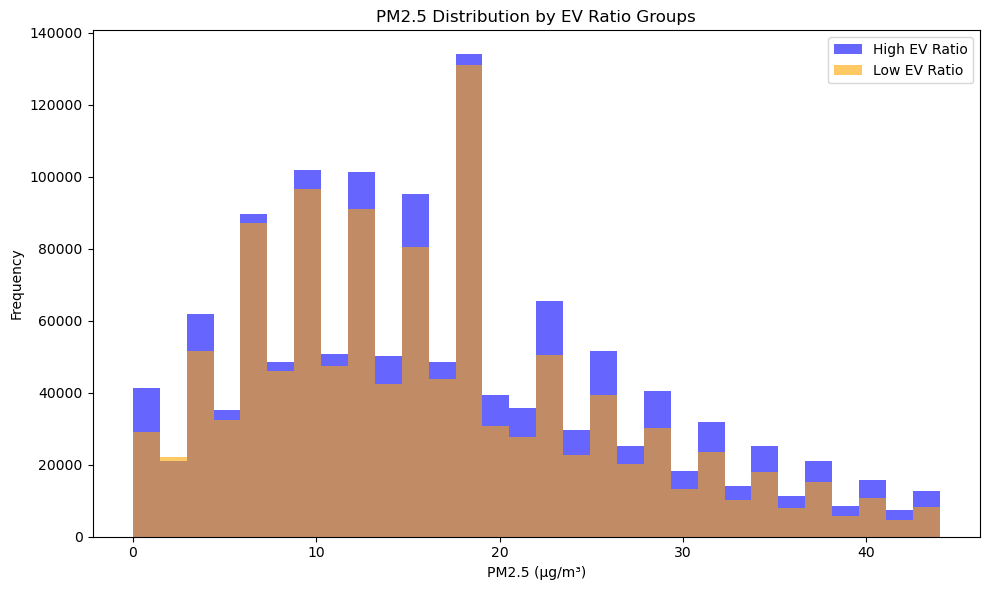

In [61]:
# 히스토그램으로 그룹 간 분포 비교
plt.figure(figsize=(10, 6))
plt.hist(high_ev['PM25'], bins=30, alpha=0.6, label='High EV Ratio', color='blue')
plt.hist(low_ev['PM25'], bins=30, alpha=0.6, label='Low EV Ratio', color='orange')
plt.title('PM2.5 Distribution by EV Ratio Groups')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

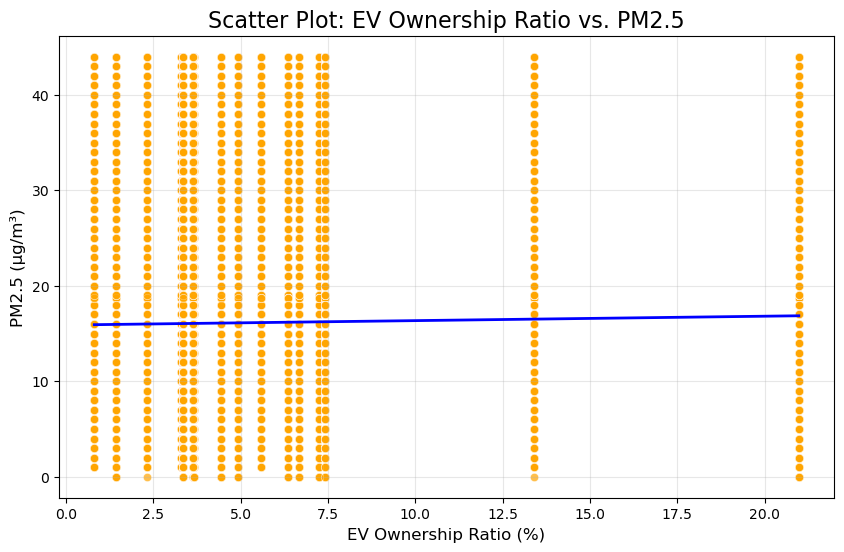

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EV_보유_비율(%)', y='PM25', data=cleaned_with_ev_data_PM25, alpha=0.7, color='orange')
sns.regplot(x='EV_보유_비율(%)', y='PM25', data=cleaned_with_ev_data_PM25, scatter=False, color='blue', line_kws={"linewidth":2})

# 그래프 제목 및 축 레이블 설정
plt.title('Scatter Plot: EV Ownership Ratio vs. PM2.5', fontsize=16)
plt.xlabel('EV Ownership Ratio (%)', fontsize=12)
plt.ylabel('PM2.5 (µg/m³)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


---
#### 🧐 <span style="color:aquamarine;font-weight:bold;">Analysis 6</span>

* **Pearson 및 Spearman 상관계수**
    - Pearson 상관계수: 0.0319
        - 즉, PM2.5와 전기차 보급률 간 선형적인 상관관계는 거의 없음을 나타냄. (값이 0에 가까울수록 상관관계가 약함)
    -  Spearman 상관계수: 0.0192
        - 두 변수 간 순위 기반의 상관관계도 거의 없음을 보여줌.
    
<br>

* **EV 비율 상위/하위 그룹 간 PM2.5 평균 비교**
    - EV 비율 상위 25% 그룹: PM2.5 평균 = 16.87
    - EV 비율 하위 25% 그룹: PM2.5 평균 = 16.13
        - 상위 그룹과 하위 그룹 간 PM2.5 평균 차이는 0.74로 매우 작아, 전기차 보급률이 PM2.5 농도에 유의미한 영향을 미치지 않는 것으로 보임.
---

*📌 <span style="color:skyblue;">기존 예상했던 PM25와 전기차 보급 비율간의 유의미한 관계가 파악되지 않아 **다른 물질들** 간의 상관관계 파악을 위한 추가 단계 진행</span>*

In [65]:
# 1️⃣ 분석할 대기오염 물질 리스트
pollutants = ['SO2', 'CO', 'O3', 'NO2', 'PM10']

# 2️⃣ 상관계수 계산 및 저장
correlation_results = []

for pollutant in pollutants:
    pearson_corr = cleaned_with_ev_data['EV_보유_비율(%)'].corr(cleaned_with_ev_data[pollutant], method='pearson')
    spearman_corr = cleaned_with_ev_data['EV_보유_비율(%)'].corr(cleaned_with_ev_data[pollutant], method='spearman')
    correlation_results.append({
        'Pollutant': pollutant,
        'Pearson Correlation': pearson_corr,
        'Spearman Correlation': spearman_corr
    })

# 3️⃣ 결과를 데이터프레임으로 정리
correlation_df = pd.DataFrame(correlation_results)

# 4️⃣ 결과 출력
print(correlation_df)

  Pollutant  Pearson Correlation  Spearman Correlation
0       SO2            -0.032240              0.062517
1        CO             0.035070              0.039994
2        O3            -0.061052             -0.061059
3       NO2             0.191031              0.196420
4      PM10             0.049567              0.047148


---
#### 🧐 <span style="color:aquamarine;font-weight:bold;">Analysis 6</span>

* EV 보급률과 오염물질(SO₂, CO, O₃, PM10)의 상관관계는 대부분 낮거나 거의 0에 가까움.
* Project Proposal과의 일치
    * 타이어 및 브레이크 마모와 같은 <span style="color:skyblue;">2차적 미세먼지 발생 원인을 고려</span>해야 한다는 제안서의 내용과 부합함.
    * PM2.5를 포함한 일부 오염물질 감소 효과는 EV 보급만으로 제한적일 수 있다는 점에서 제안서의 예측과 일치함.

---

### ✅ <span style="color:; font-size:25px;">C. 최종 시각화</span>

#### A. Scatter Plot
* <span style="color:aquamarine;font-weight:bold;">[FINAL] *Scatter Plot: EV Ownership Ratio vs. PM2.5*</span>
* 목적: 전기차 비율과 PM2.5 간의 상관관계 표현.
* 구성:
    - X축: EV Ownership Ratio(%)
    - Y축: PM2.5 (µg/m³)
    - 각 점은 하나의 지역을 나타내며, 지역 이름 레이블 추가.

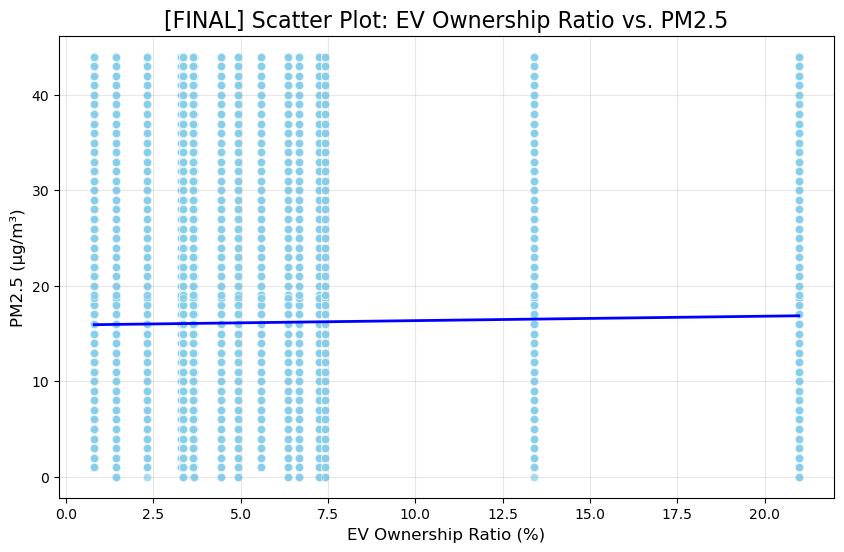

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EV_보유_비율(%)', y='PM25', data=cleaned_with_ev_data_PM25, alpha=0.7, color='skyblue') 
sns.regplot(x='EV_보유_비율(%)', y='PM25', data=cleaned_with_ev_data_PM25, scatter=False, color='blue', line_kws={"linewidth":2})

# 그래프 제목 및 축 레이블 설정
plt.title('[FINAL] Scatter Plot: EV Ownership Ratio vs. PM2.5', fontsize=16)
plt.xlabel('EV Ownership Ratio (%)', fontsize=12)
plt.ylabel('PM2.5 (µg/m³)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


---
##### B. Composite Heatmap
* <span style="color:aquamarine;font-weight:bold;">*final_ev_pm25_heatmap.html*</span>
* 목적: 지역별 전기차 보유 비율과 PM2.5 농도를 시각적으로 표현.
* 구성:
    - PM2.5 농도 히트맵
        - 표현 방식: 지역별 PM2.5 농도를 히트맵의 색상(빨강~초록)으로 나타냄.  
        - 의미: PM2.5 농도가 높을수록 빨간색, 낮을수록 초록색으로 표시. 

    - 전기차 보유 비율 원 마커
        - 표현 방식 : 지역별 전기차 보유 비율을 원(circle marker)의 크기와 투명도(opacity)로 나타냄.
        - 의미 : 전기차 비율이 높을수록 원의 크기가 커지고, 투명도가 낮아 선명하게 표시됨.

    - Interactive 팝업
        - 지역별 PM2.5 농도와 전기차 보유 비율을 팝업으로 확인 가능. 
---

In [73]:
import folium
from folium.plugins import HeatMap

# PM2.5와 전기차 비율 데이터를 결합
# `merged_coordinates`는 위도, 경도, 평균_PM25를 포함
# `cleaned_with_ev_data`에서 전기차 비율 데이터를 추가로 가져옴
final_data = pd.merge(
    merged_coordinates,
    cleaned_with_ev_data[['지역', 'EV_보유_비율(%)']],
    on='지역',
    how='inner'
)

# 지도 생성
m = folium.Map(location=[37.5665, 126.9780], zoom_start=10)  # 서울 중심 좌표

In [77]:
#print(type(final_data))
final_data.head()

,지역,위도,경도,평균_PM25,EV_보유_비율(%)
0,서울 중구,37.563656,126.99751,17.356973,13.410002
1,서울 중구,37.563656,126.99751,17.356973,13.410002
2,서울 중구,37.563656,126.99751,17.356973,13.410002
3,서울 중구,37.563656,126.99751,17.356973,13.410002
4,서울 중구,37.563656,126.99751,17.356973,13.410002


In [79]:
# PM2.5 히트맵 데이터 준비
pm25_heat_data = [
    [row['위도'], row['경도'], row['평균_PM25']] for _, row in final_data.iterrows()
]

In [83]:
print(type(pm25_heat_data))

<class 'list'>


In [85]:
# 히트맵 추가 (PM2.5 농도)
HeatMap(pm25_heat_data, radius=15, blur=10, max_zoom=13, min_opacity=0.5).add_to(m)

In [ ]:
# 전기차 비율 데이터를 원 마커로 표현
for _, row in final_data.iterrows():
    folium.CircleMarker(
        location=(row['위도'], row['경도']),
        radius=max(row['EV_보유_비율(%)'] / 2, 5),  # 최소 크기 설정
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=row['EV_보유_비율(%)'] / 100,  # 투명도: EV 비율 기반
        popup=f"지역: {row['지역']}<br>PM2.5: {row['평균_PM25']} µg/m³<br>EV 비율: {row['EV_보유_비율(%)']}%"
    ).add_to(m)

# 지도 저장 및 출력
m.save('final_ev_pm25_heatmap.html')
m